In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data', index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# using KNN
the distance between the data points really matter and therefore the scale as well. so we need to standardize.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis = 1)) # we're fitting the scaler, Compute the mean and std to be used for later scaling. we don't need the Target Class

StandardScaler()

In [7]:
scaled_featureds = scaler.transform(df.drop('TARGET CLASS', axis = 1)) # performing standardization, centering and scaling, again no need with the Target Class

In [9]:
df_feat = pd.DataFrame(scaled_featureds, columns = df.columns[:-1]) #creating a new dataframe with standardized features. dropping the last column name of df

In [10]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


now the data is ready

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df_feat
y = df['TARGET CLASS'] # now we're using that column

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1) # initiating
knn.fit(X_train, y_train) # fitting\ training
predictions = knn.predict(X_test) # predicting

evaluating

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



pretty good already with 1 neighboor, but we'll try to maximize the model performance 

In [18]:
error_rate = []

for i in range (1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i) #creating a model
    knn.fit(X_train, y_train) #fitting it
    pred_i = knn.predict(X_test) # predicting with it
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

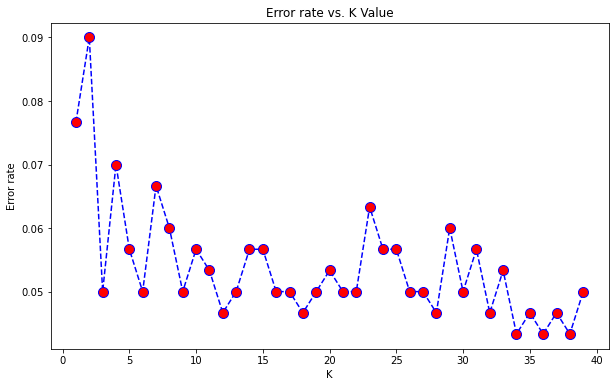

In [25]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', 
         linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',
        markersize = 10)
plt.title('Error rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

sure there seems to be that the higher k value - the better our model is with a lower Error rate. but taking a higher k value will correspond with a more time consuming model. The difference between the Error rate  for k = 12 or k = 18 to k = 34 is not substantial, but it'll be more combersome.  So we'll stick with k = 18.

In [27]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train) #fitting it
pred= knn.predict(X_test) # predicting with it

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[155   4]
 [ 10 131]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       159
           1       0.97      0.93      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

